# Adding New Features

The housing dataset for Beijing provides valuable information. In this section of the project, we will add two new features to the dataset. Then, we will use visualization tools to create graphs to examine the relationships between these new features and the existing ones.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

housing_no_outlier = pd.read_csv('housing_no_outlier.csv', encoding='gbk')
housing_no_outlier

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7
2,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6
3,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1
4,116.466280,39.991363,2016-07-22,861.0,275.6,53.00,1,0,1,1,8,2005,Simplicity,steel-concrete composite,0.333,has elevator,no subway,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285035,116.546899,39.755236,2016-06-09,1.0,355.5,134.20,3,2,1,2,9,2009,hardcover,steel-concrete composite,0.500,has elevator,no subway,3
285036,116.546899,39.755236,2016-06-10,1.0,350.0,170.07,3,2,1,2,5,2003,other,steel-concrete composite,0.333,no elevator,no subway,3
285037,116.497474,39.810115,2016-06-10,1.0,108.8,35.09,1,0,1,1,24,2009,other,steel-concrete composite,0.222,has elevator,has subway,3
285038,116.497256,39.804081,2016-06-05,1.0,359.0,102.17,2,2,1,2,7,2000,Simplicity,steel-concrete composite,0.500,has elevator,no subway,3


## Step 1

In this step, we will calculate the distance of each house from the center of Beijing using the given geographical coordinates (longitude: 116.4074, latitude: 39.9042). The distance will be stored in a new column called `distanceToCapital`. Use NumPy for calculations and create a new DataFrame named `housing_capital` containing this feature.


$$ distance = acos(sinφ_1*sinφ_2 + cosφ_1*cosφ_2 * cos(λ_2-λ_1)) * 6371.0088 $$
$$ φ: \text{latitude} $$ 
$$ λ: \text{longitude} $$ 

In [7]:
from math import radians
capital_Lng = radians(116.4074)
capital_Lat = radians(39.9042)

housing_capital = housing_no_outlier.copy()
housing_capital['distanceToCapital'] = housing_capital['Lat'].apply(lambda x: np.sin(radians(x))) * np.sin(capital_Lat) + housing_capital['Lat'].apply(lambda x: np.cos(radians(x))) * np.cos(capital_Lat) * housing_capital['Lng'].apply(lambda x: np.cos(radians(x)- capital_Lng))
housing_capital['distanceToCapital'] = housing_capital['distanceToCapital'].apply(lambda x: np.arccos(x) * 6371.0088)
housing_capital.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district,distanceToCapital
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7,14.074996
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7,4.701224
2,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6,19.293041
3,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1,2.683335
4,116.466280,39.991363,2016-07-22,861.0,275.6,53.00,1,0,1,1,8,2005,Simplicity,steel-concrete composite,0.333,has elevator,no subway,7,10.914652


## Step 2

In this step, calculate the price per square meter for each house and store it in the `pricePerSquare` column. Note that the total price is given in million yuan, so multiply the result by 1000 to convert it to *yuan*. Save the resulting DataFrame as `housing_PPS`.


In [8]:
housing_PPS = housing_capital.copy()

housing_PPS['pricePerSquare'] = (housing_PPS['totalPrice']/housing_PPS['square'])*1000

housing_PPS.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district,distanceToCapital,pricePerSquare
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7,14.074996,3167.938931
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7,4.701224,4343.556428
2,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6,19.293041,2220.149254
3,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1,2.683335,4839.506173
4,116.466280,39.991363,2016-07-22,861.0,275.6,53.00,1,0,1,1,8,2005,Simplicity,steel-concrete composite,0.333,has elevator,no subway,7,10.914652,5200.000000


C:\Users\Asus\AppData\Local\Temp\ipykernel_18768\60454985.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  housing_PPS.hist(ax = ax, bins = 20);


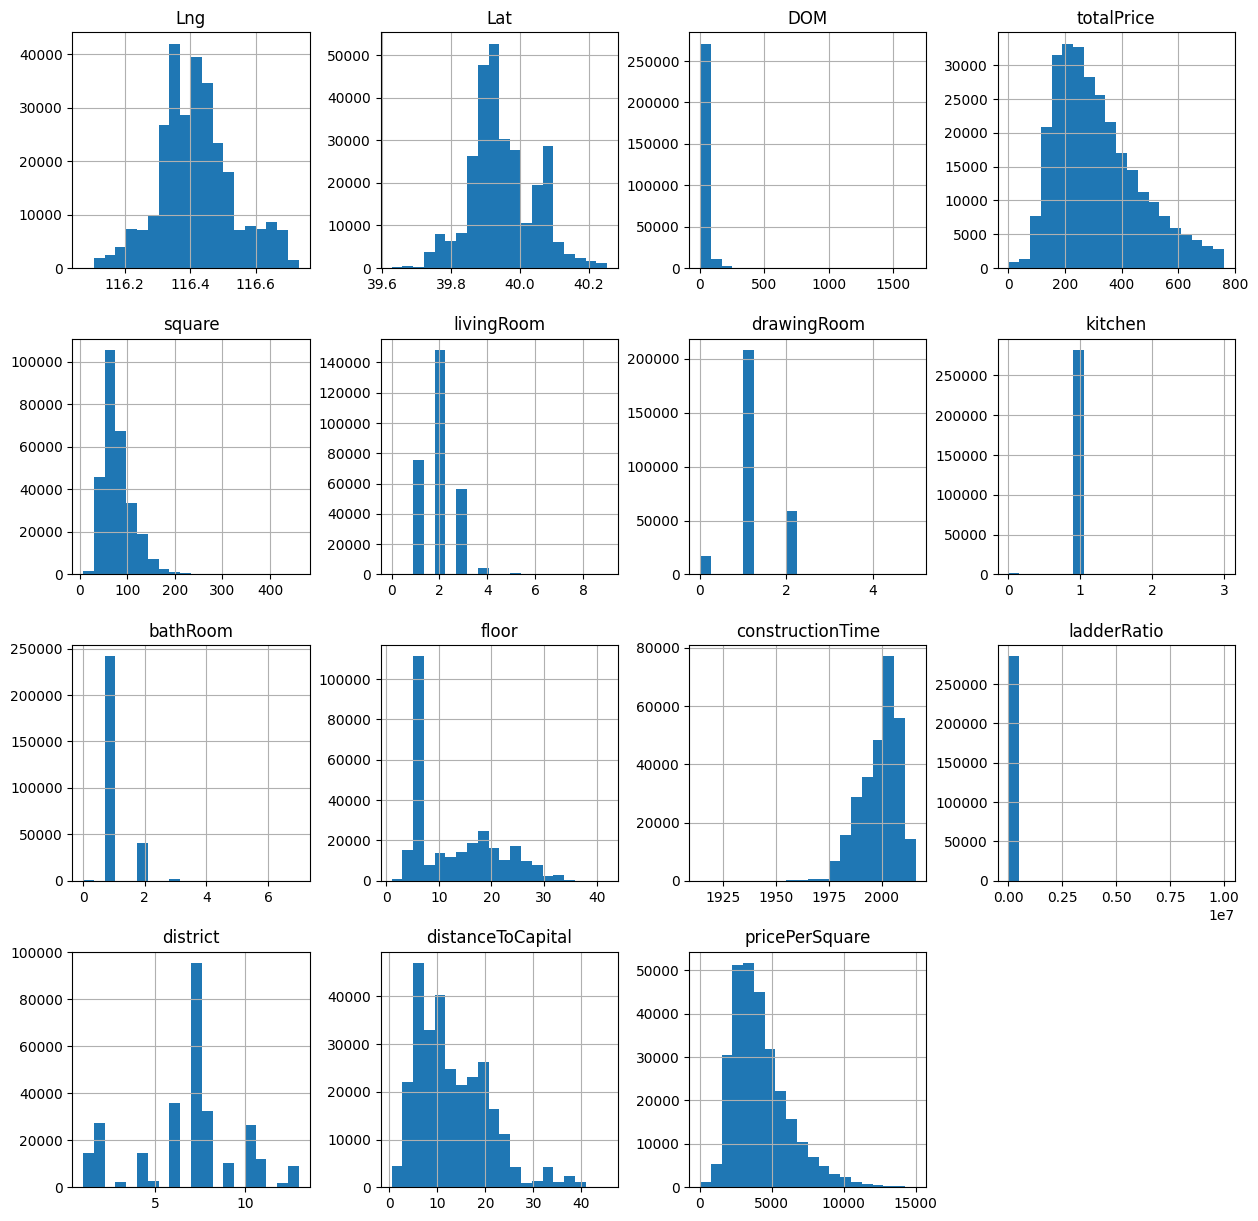

In [9]:
fig , ax = plt.subplots()
fig.set_size_inches(15,15)
housing_PPS.hist(ax = ax, bins = 20);

Conclusion:

Based on the chart, it can be observed that the majority of house prices are concentrated around 200 million yuan, with a noticeable skew towards this value. Additionally, most of the houses were built around the year 2000. The maximum distance from the city center is 40 kilometers. Lastly, the majority of houses have two bedrooms. This analysis provides further insights into the characteristics of the houses.

## Analyzing the Effect of Distance from the Center on Price per Square Meter
We want to use the new column we created and see how the price per square meter changes as we move away from the city center.


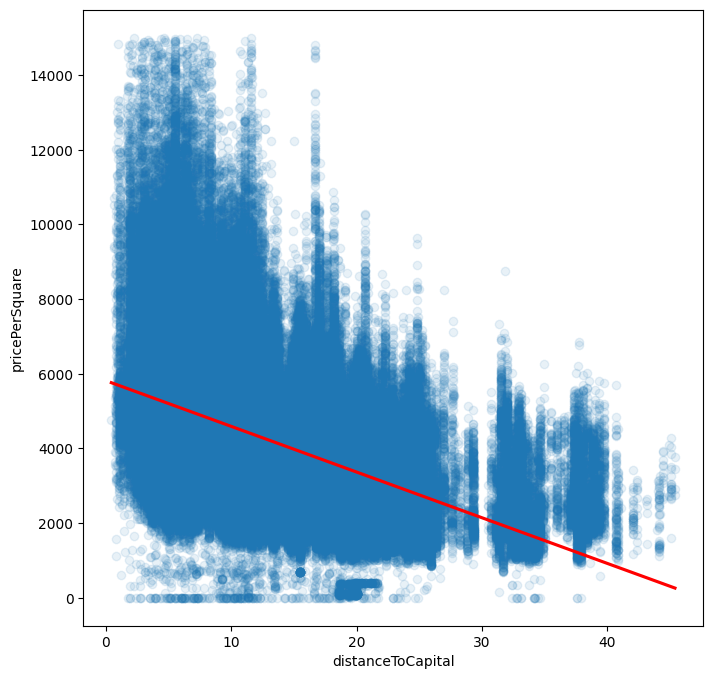

In [10]:
fig , ax = plt.subplots()
fig.set_size_inches(8,8)

sns.regplot(ax = ax, data = housing_PPS, x = 'distanceToCapital', y = 'pricePerSquare', 
                   line_kws={'color':'red'}, scatter_kws= {'alpha': 0.1});

## Step 3: Analyzing the Impact of Elevator Presence on Price per Square Meter

In this section, we aim to examine how the presence of an elevator affects the price per square meter of homes. Several visualization methods can be used for this analysis.

<p style="text-align:center;"><img src="output.png"></p>

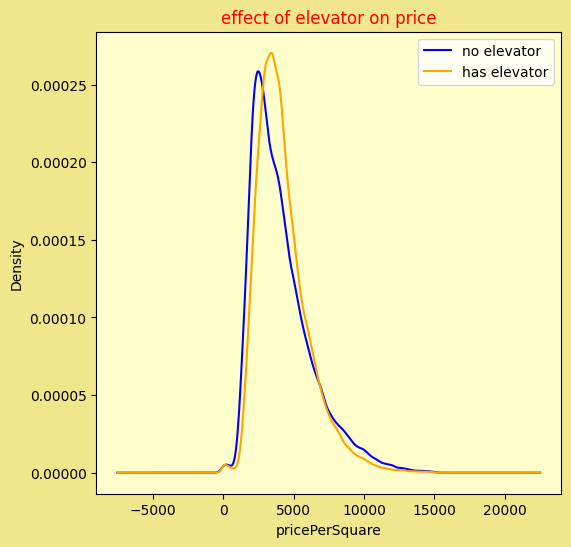

In [17]:
fig, ax =plt.subplots(figsize=(6, 6))
housing_PPS1=housing_PPS.copy()
housing_PPS[housing_PPS.elevator == 'no elevator']['pricePerSquare'].plot(kind='kde',ax=ax,label='no elevator',color='blue')
housing_PPS[housing_PPS.elevator == 'has elevator']['pricePerSquare'].plot(kind='kde',ax=ax,label='has elevator',color='orange').set_title("effect of elevator on price",color='red')
ax.set_ylabel("Density")
ax.set_xlabel("pricePerSquare")
ax.set_facecolor('#ffffcc') 
fig.set_facecolor('khaki')
leg = ax.legend(loc="upper right")

In [18]:
housing_PPS.to_csv('housing_extended.csv', encoding='gbk', index=False)